In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Downloads\\Classification_train\\Classification_train.csv")
# print(data)
# print(data.columns)
data = data.to_numpy()    #converting the dataset to numpy

<H3>STEPS</H3>
1)Understanding the training dataset and validation dataset
<br>
2)Feature scaling
<br>
3)Defining necessary functions
<br>
4)accuracy
<br>
5)Working on Test-dataset

In [3]:
np.random.shuffle(data)
X = data[:, range(1,785)]   #features
Y = data[: , 0]            #targets

In [4]:
X_train = X[:20000 , :]
Y_train = Y[:20000]
X_val = X[20000: , :]
Y_val = Y[20000:]


In [5]:
print(X_train[:2, :])
X_train.shape


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(20000, 784)

In [6]:
print(Y_train)
print(Y_train.shape)
print(Y_train.dtype)

[2 5 5 ... 1 5 7]
(20000,)
int64


In [7]:
print(X_train[0].max())
print(X_train[0].min())

255
0


<h3>Feature Scaling</h3>

In [10]:
def norm(X):
    denominator_range = np.ptp(X, axis=1 , keepdims = True)
    output = X/denominator_range

    return output

In [11]:
X_train_final = norm(X_train)    #final X that is to be used for further computations
print(X_train)
X_val_final = norm(X_val)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [12]:
print(X_train_final[0].max())
print(X_train_final[0].min())

1.0
0.0


In [13]:
print(X_val_final[0].max())
print(X_val_final[0].min())

1.0
0.0


<function matplotlib.pyplot.show(close=None, block=None)>

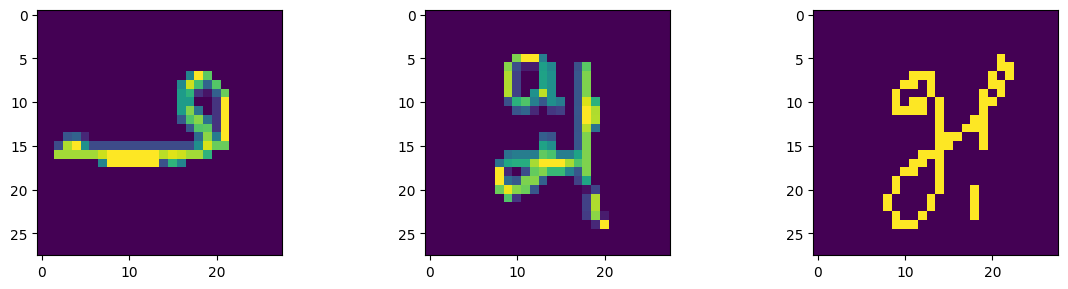

In [14]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_train[i].reshape(28,28))
plt.tight_layout()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

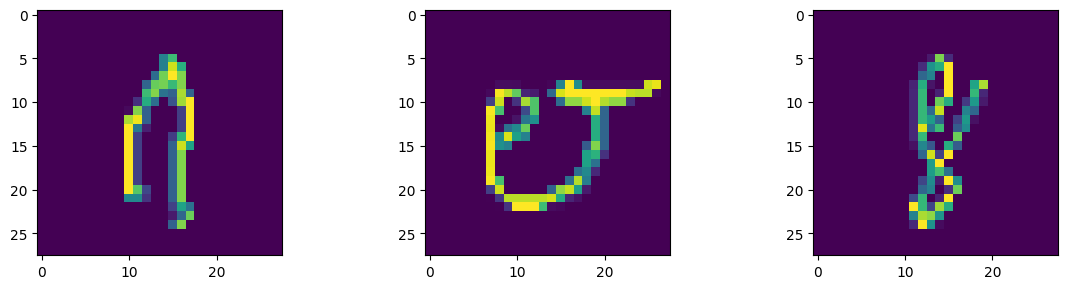

In [15]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(X_val[i].reshape(28,28))
plt.tight_layout()
plt.show

In [16]:
t = np.unique(Y_train)
print(t)

[0 1 2 3 4 5 6 7 8 9]


In [17]:
classes = t.shape[0]
print(classes)

10


In [21]:
def KNN(X_train , X_test, Y_train,K):
    m,n  = X_test.shape
    Y_predict = np.zeros(m)
    distances = -2*X_test@X_train.T + np.sum(X_test**2 , axis = 1 , keepdims = True) + np.sum(X_train**2  , axis = 1 , keepdims = 1).T
    sorted_dist_indices = np.argsort(distances , axis = 1)
    for i in range(m):       
        labels = Y_train[sorted_dist_indices[i , :K]]
        Y_predict[i] = np.bincount(labels).argmax()
    return Y_predict

In [29]:
for k in [3, 5, 7, 9, 11]:
    Y_predict = KNN(X_train_final, X_val_final, Y_train, K=k)
    acc = np.mean(Y_predict == Y_val)
    print("Accuracy for k =", k, ":", acc)



Accuracy for k = 3 : 0.9774
Accuracy for k = 5 : 0.977
Accuracy for k = 7 : 0.9758
Accuracy for k = 9 : 0.9749
Accuracy for k = 11 : 0.973


<h5>OPTIMAL "K" VALUE = "3"</h5>

<h3>Testing the model on the Test dataset</h3>

In [22]:
test_data = pd.read_csv("Downloads\\Classification_test\\Classification_test.csv")
# print(test_data.columns)
test_data = test_data.to_numpy()

In [23]:
test_X = np.delete(test_data , 0 , axis =1)
ID = test_data[:,0]

In [24]:
test_X.shape

(10000, 784)

In [25]:
test_X_final = norm(test_X)

<function matplotlib.pyplot.show(close=None, block=None)>

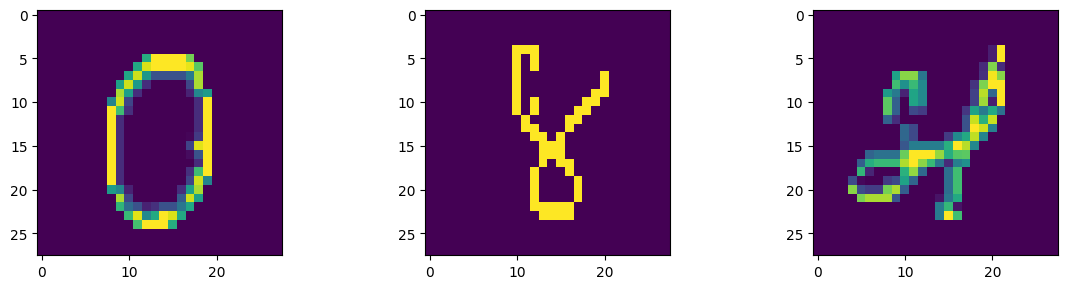

In [26]:
fig,ax=plt.subplots(1,3,figsize=(12,3))
for i in range(3):
    ax[i].imshow(test_X[i].reshape(28,28))
plt.tight_layout()
plt.show

In [30]:
test_Y_predict = KNN(X_train_final , test_X_final , Y_train , K=3)

In [31]:
print(test_Y_predict)
test_Y_predict.shape

[0. 4. 5. ... 0. 8. 4.]


(10000,)

In [32]:
predictions = np.c_[ID,test_Y_predict]
df = pd.DataFrame(predictions , columns = ['IDs','Predicted-Labels'])
df.to_csv("Downloads\\CL-Project\\KNN_Predictions.csv", index=False)